Oasis Infobytes : Data Science Internship

Task-3 : Car Price Prediction with Machine Learning

The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning.

Car Price Prediction with Machine Learning

Car price prediction using machine learning is a common application of regression algorithms. In order to predict car prices, you would typically need a dataset that includes information about various car features, such as make, model, year, mileage, engine size, fuel type, transmission type, and other relevant characteristics.

Steps to build a machine learning model for car price prediction:

Data Collection: Collect the car data needed to build the machine learning model. This may include scraping websites, purchasing datasets, or collecting data from dealerships.

Data Preparation: Pre-process the data to ensure that it is in a format that can be used for analysis. This includes cleaning the data, removing duplicates, dealing with missing values, and encoding categorical variables.

Feature Selection: Identify which features are most relevant to predicting car prices. We can use techniques such as correlation analysis, feature importance analysis, or domain knowledge to identify the most important features.

Model Selection: Choose a regression algorithm that is best suited for our dataset. 

Model Training: Train the machine learning model on the dataset using the selected algorithm.

Model Evaluation: Evaluate the performance of the model using metrics such as mean squared error (MSE), root mean squared error (RMSE), or R-squared.

In [258]:
# importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [172]:
cars_data = pd.read_csv('CarPrice_Assignment.csv')
cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [173]:
cars_data.shape

(205, 26)

In [174]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [175]:
cars_data.info

<bound method DataFrame.info of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible   

In [176]:
cars_data.describe()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [177]:
cars_data.describe(percentiles = [0.10,0.25,0.50,0.75,0.90,0.99])


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
10%,21.400000,-1.000000,93.700000,157.300000,63.800000,50.600000,1947.000000,91.000000,2.970000,2.882000,8.000000,68.000000,4500.000000,17.000000,23.000000,6657.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
90%,184.600000,3.000000,107.900000,188.800000,68.640000,56.620000,3230.000000,181.000000,3.672000,3.540000,10.940000,160.000000,5780.000000,31.600000,38.000000,22563.000000
99%,202.960000,3.000000,115.544000,202.480000,71.700000,59.100000,3948.000000,302.160000,3.800000,3.900000,23.000000,207.000000,6000.000000,44.720000,49.880000,40802.720000


In [178]:
cars_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [179]:
cars_data.duplicated(subset = ['car_ID']).sum()


0

In [180]:
cars_data = cars_data.drop(['car_ID'], axis =1)


In [181]:
cars_data['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [182]:
cars_data['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

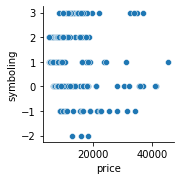

In [183]:
sns.pairplot(y_vars = 'symboling', x_vars = 'price' ,data = cars_data)


In [184]:
cars_data['car_company'] = cars_data['CarName'].apply(lambda x:x.split(' ')[0])


In [185]:
cars_data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [186]:
cars_data.tail()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo
204,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0,volvo


In [187]:
cars_data = cars_data.drop(['CarName'], axis =1)

In [188]:
cars_data['car_company'].value_counts()


toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: car_company, dtype: int64

In [189]:
cars_data.describe()


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [190]:
cars_data['car_company'].replace('toyouta', 'toyota',inplace=True)
cars_data['car_company'].replace('Nissan', 'nissan',inplace=True)
cars_data['car_company'].replace('maxda', 'mazda',inplace=True)
cars_data['car_company'].replace('vokswagen', 'volkswagen',inplace=True)
cars_data['car_company'].replace('vw', 'volkswagen',inplace=True)
cars_data['car_company'].replace('porcshce', 'porsche',inplace=True)

In [191]:
print(cars_data['car_company'].value_counts())
print(cars_data['fueltype'].value_counts())
print(cars_data['aspiration'].value_counts())
print(cars_data['doornumber'].value_counts())


toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64
gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64


In [192]:
def number_(x):
    return x.map({'four':4, 'two': 2})
    
cars_data['doornumber'] = cars_data[['doornumber']].apply(number_)

In [193]:
print(cars_data['doornumber'].value_counts())
print(cars_data['carbody'].value_counts())
print(cars_data['drivewheel'].value_counts())
print(cars_data['enginelocation'].value_counts())
print(cars_data['wheelbase'].value_counts().head())


4    115
2     90
Name: doornumber, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
94.5    21
93.7    20
95.7    13
96.5     8
97.3     7
Name: wheelbase, dtype: int64


C:\Users\91782\AppData\Local\Temp/ipykernel_17720/4163632824.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars_data['wheelbase'])


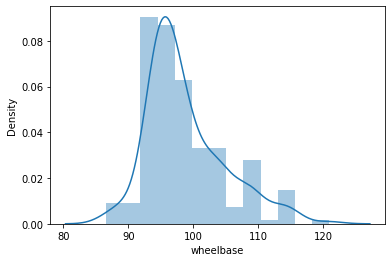

In [194]:
sns.distplot(cars_data['wheelbase'])
plt.show()

C:\Users\91782\AppData\Local\Temp/ipykernel_17720/3690710603.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars_data['carlength'])


157.3    15
188.8    11
171.7     7
186.7     7
166.3     7
Name: carlength, dtype: int64


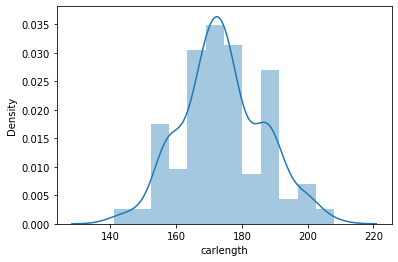

In [195]:
print(cars_data['carlength'].value_counts().head())
sns.distplot(cars_data['carlength'])
plt.show()

In [196]:
print(cars_data['enginetype'].value_counts())
print(cars_data['cylindernumber'].value_counts())


ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64


In [197]:
def convert_number(x):
    return x.map({'two':2, 'three':3, 'four':4,'five':5, 'six':6,'eight':8,'twelve':12})

cars_data['cylindernumber'] = cars_data[['cylindernumber']].apply(convert_number)

In [198]:
print(cars_data['cylindernumber'].value_counts())
print(cars_data['fuelsystem'].value_counts())


4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: cylindernumber, dtype: int64
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


DATAVISUALISATION

In [199]:
cars_numeric = cars_data.select_dtypes(include =['int64','float64'])
cars_numeric.head()


,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


<Figure size 2880x2880 with 0 Axes>

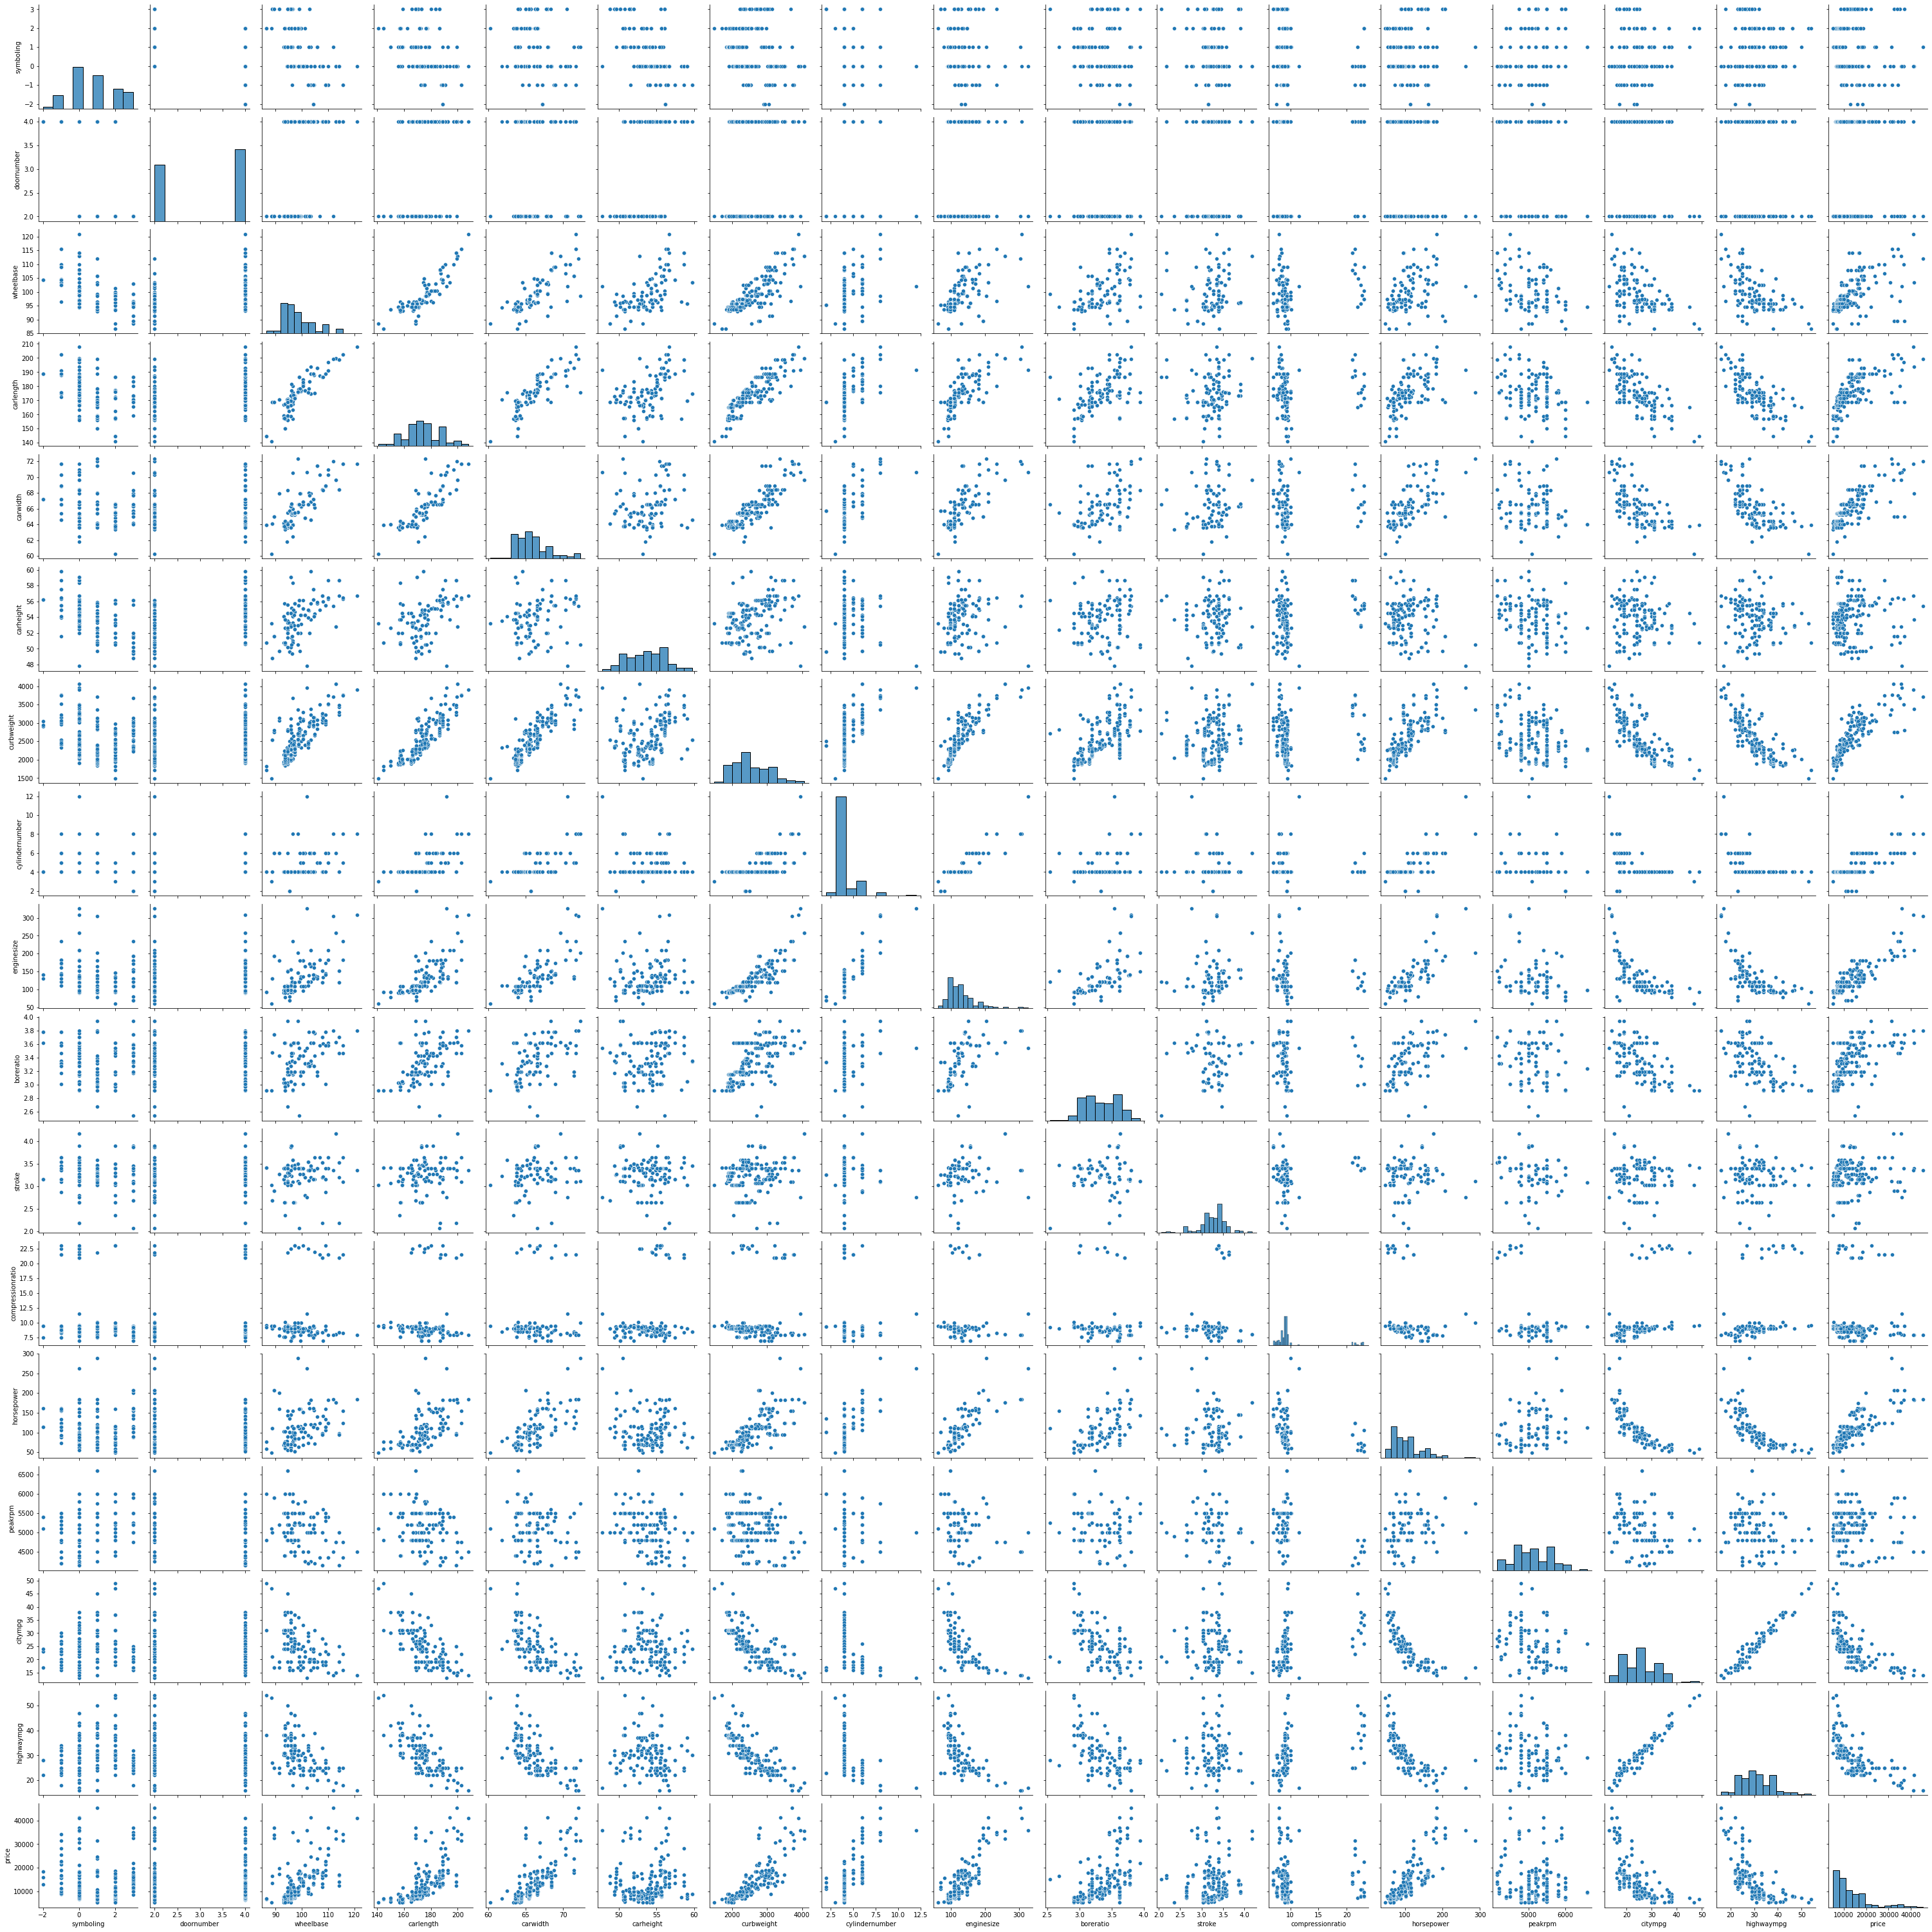

In [200]:
plt.figure(figsize = (40,40))
sns.pairplot(cars_numeric)
plt.show()

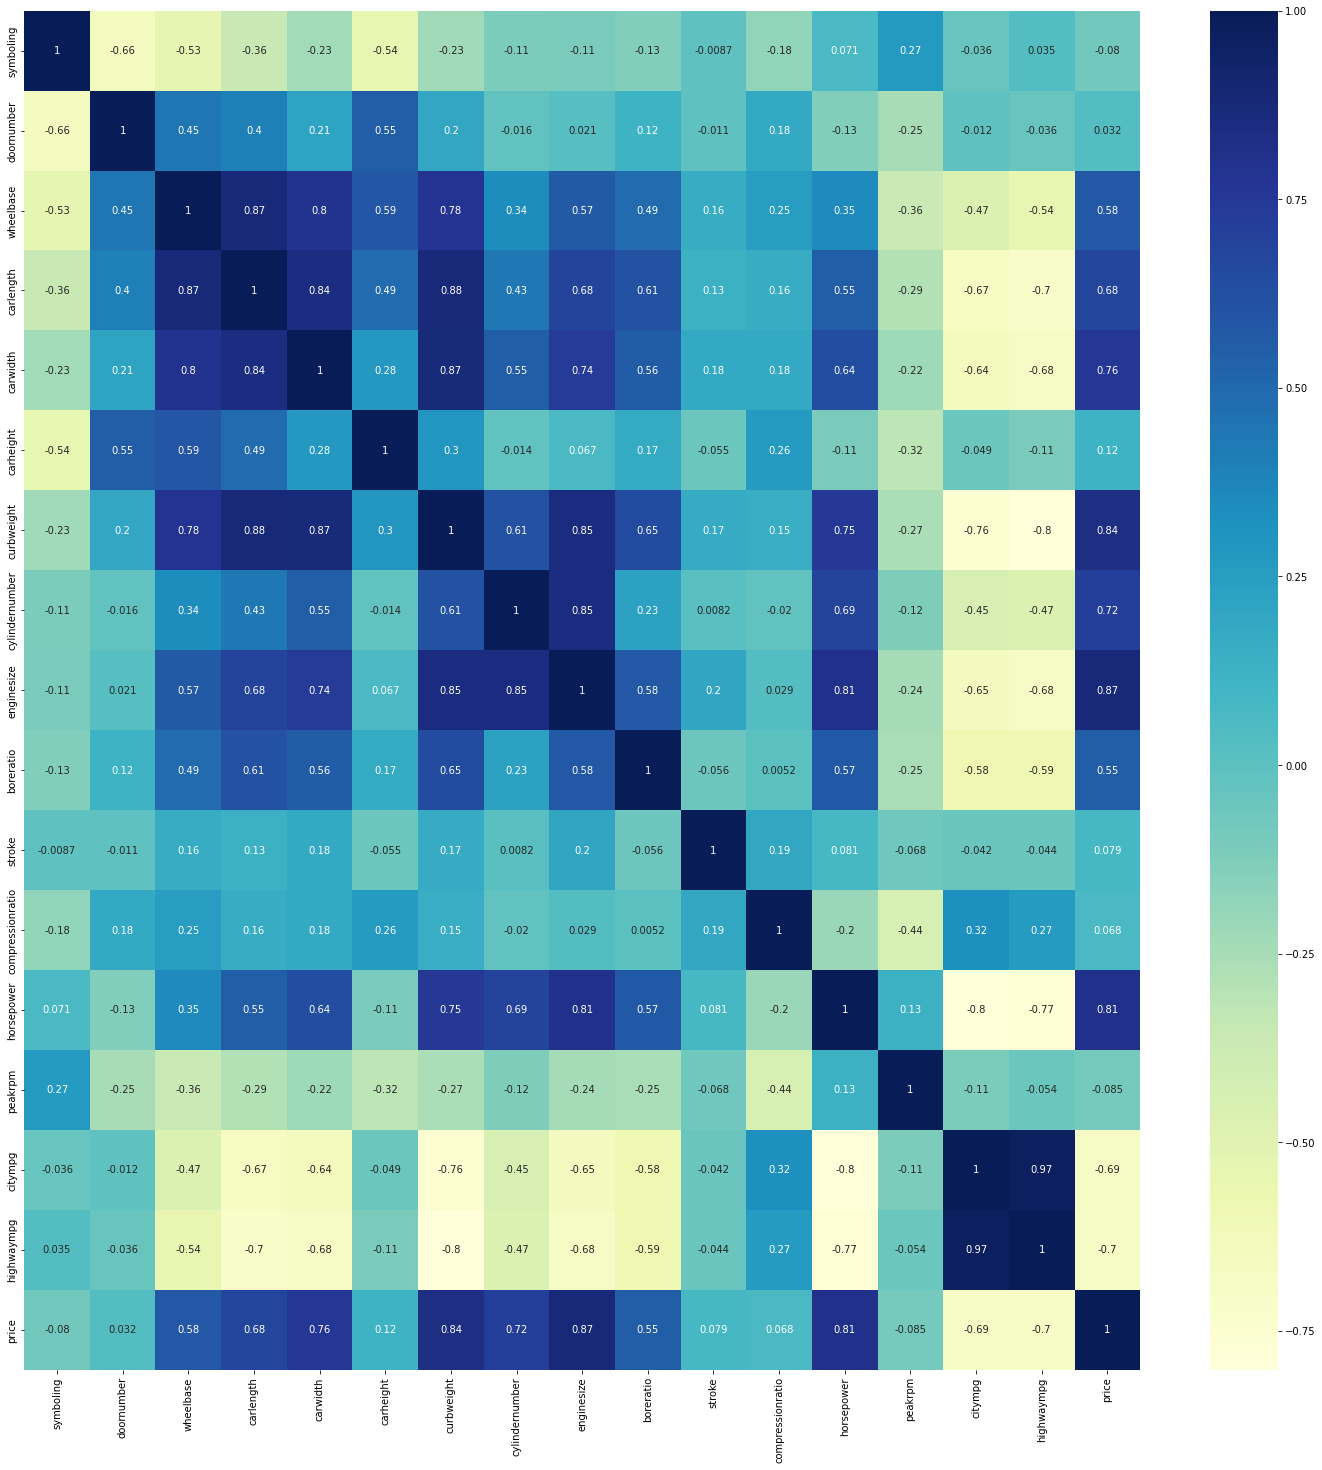

In [201]:
plt.figure(figsize = (25,25))
sns.heatmap(cars_data.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

In [202]:
categorical_cols = cars_data.select_dtypes(include = ['object'])
categorical_cols.head()


,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,car_company
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,gas,std,sedan,4wd,front,ohc,mpfi,audi


<AxesSubplot:xlabel='fuelsystem', ylabel='price'>

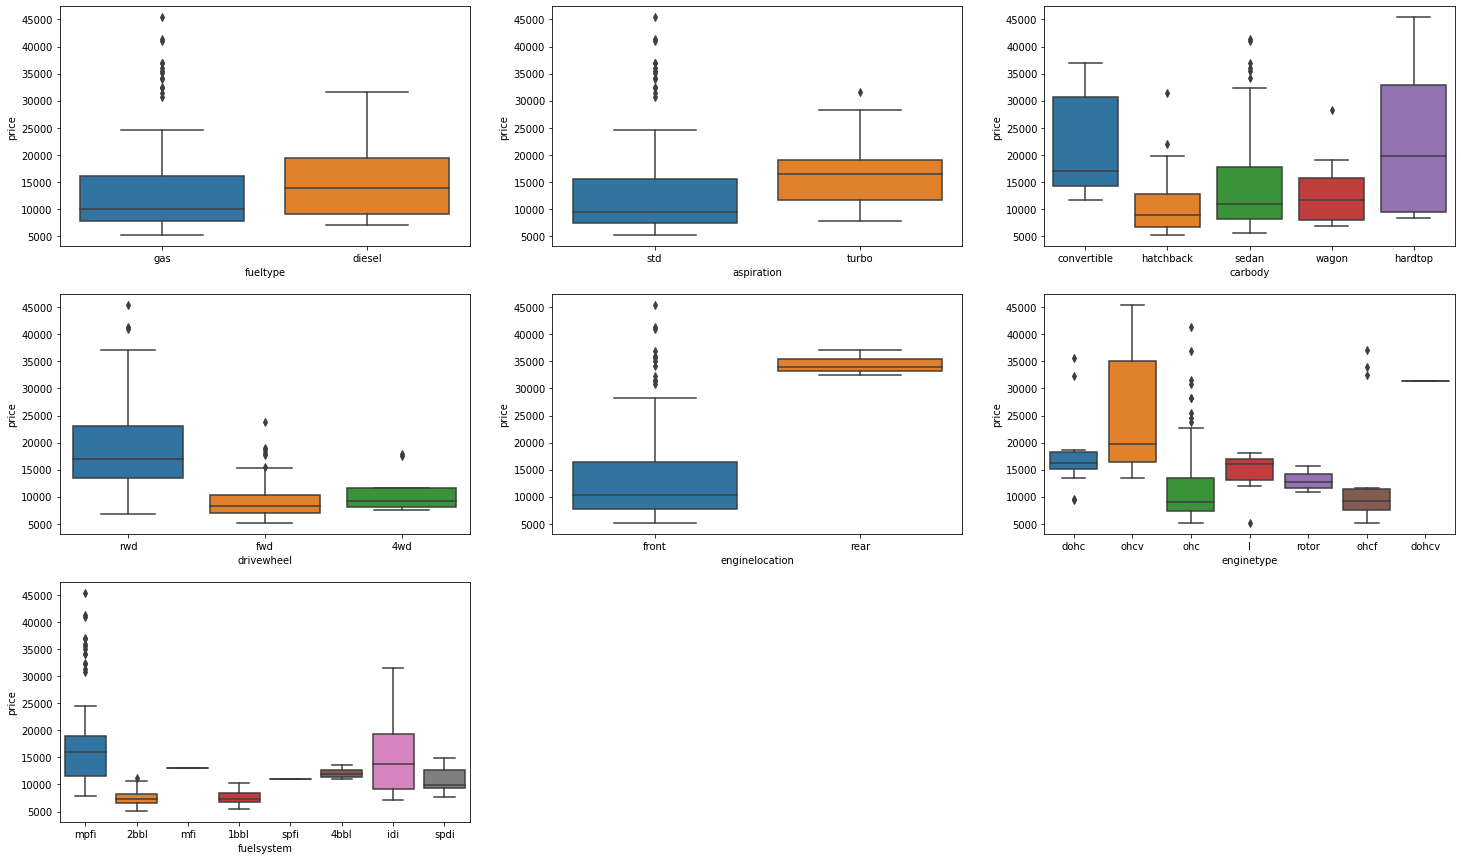

In [203]:
plt.figure(figsize = (25,15))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = cars_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = cars_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = cars_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = cars_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = cars_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginetype', y = 'price', data = cars_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cars_data)

<AxesSubplot:xlabel='car_company', ylabel='price'>

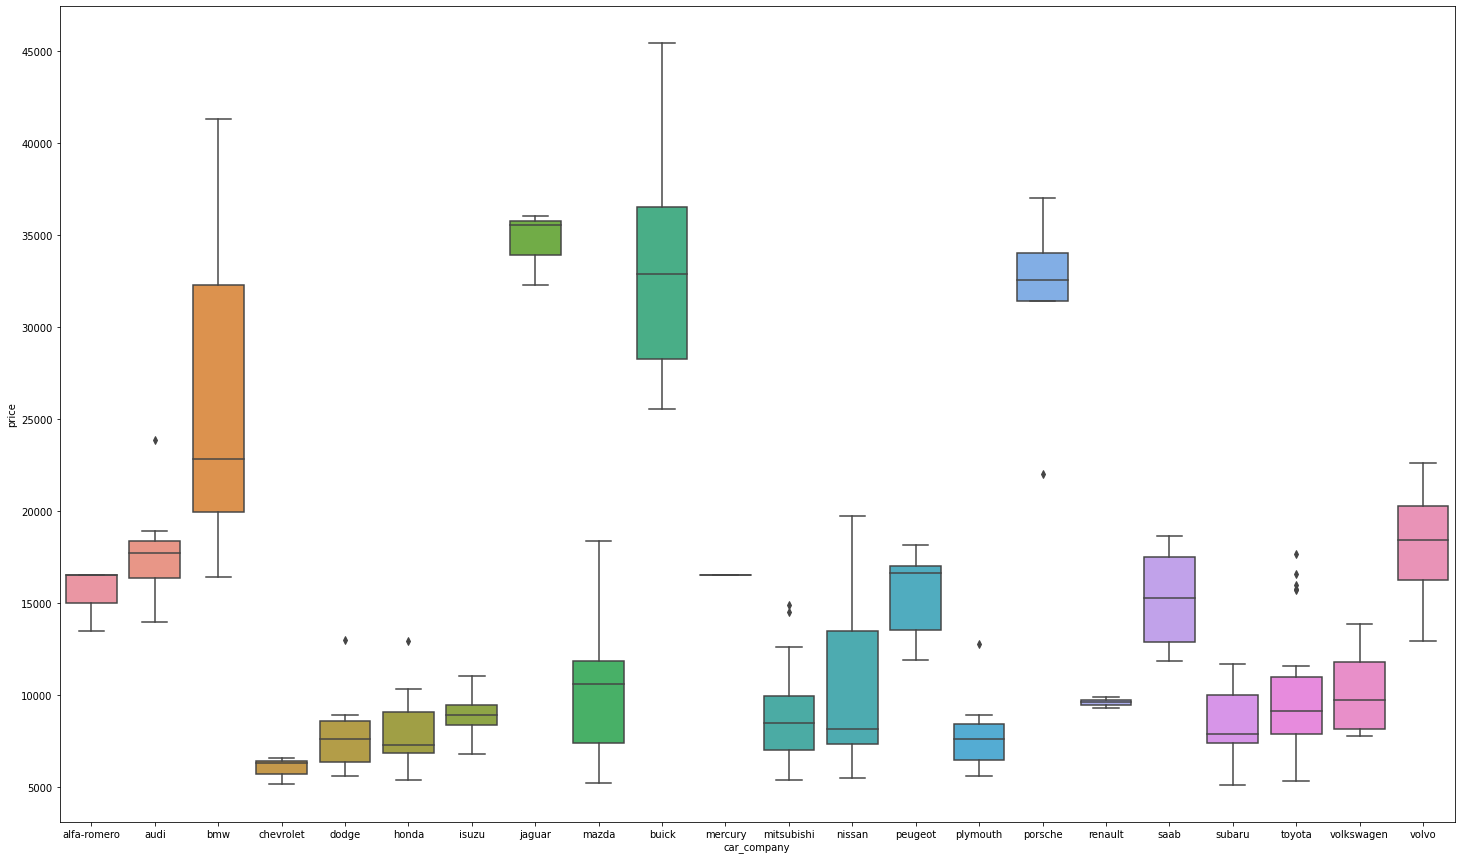

In [204]:
plt.figure(figsize = (25,15))
sns.boxplot(x = 'car_company', y = 'price', data = cars_data)

In [205]:
cars_dummies = pd.get_dummies(categorical_cols, drop_first = True)
cars_dummies.head()

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [206]:
car_df  = pd.concat([cars_data, cars_dummies], axis =1)


In [207]:
car_df = car_df.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'fuelsystem', 'car_company'], axis =1)

In [208]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   doornumber              205 non-null    int64  
 2   wheelbase               205 non-null    float64
 3   carlength               205 non-null    float64
 4   carwidth                205 non-null    float64
 5   carheight               205 non-null    float64
 6   curbweight              205 non-null    int64  
 7   cylindernumber          205 non-null    int64  
 8   enginesize              205 non-null    int64  
 9   boreratio               205 non-null    float64
 10  stroke                  205 non-null    float64
 11  compressionratio        205 non-null    float64
 12  horsepower              205 non-null    int64  
 13  peakrpm                 205 non-null    int64  
 14  citympg                 205 non-null    in

In [209]:
df_train, df_test = train_test_split(car_df, train_size = 0.7, test_size = 0.3, random_state = 100)


In [210]:
cars_numeric.columns


Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

In [211]:
col_list = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth','carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
            'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

In [212]:
scaler = StandardScaler()

In [213]:
df_train[col_list] = scaler.fit_transform(df_train[col_list])


In [214]:
df_train.describe()


,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
count,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,3.726623e-17,9.937661e-17,1.565182e-15,1.614870e-16,-4.074441e-15,5.341493e-16,-1.614870e-16,-2.484415e-16,-6.211038e-17,-1.062087e-15,...,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,...,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,-2.347020e+00,-1.126872e+00,-2.006930e+00,-2.574223e+00,-2.510760e+00,-2.371619e+00,-1.937401e+00,-2.084351e+00,-1.566427e+00,-2.412359e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.689008e-01,-1.126872e+00,-6.771770e-01,-6.186702e-01,-8.565171e-01,-7.222984e-01,-7.711028e-01,-3.514313e-01,-6.847340e-01,-9.320600e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.701590e-01,8.874120e-01,-3.405307e-01,-1.128552e-01,-1.993522e-01,6.112865e-02,-2.478347e-01,-3.514313e-01,-3.663447e-01,9.948427e-03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.701590e-01,8.874120e-01,4.505882e-01,7.076008e-01,4.804736e-01,7.414732e-01,7.203955e-01,-3.514313e-01,3.928914e-01,8.942829e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.848278e+00,8.874120e-01,2.874442e+00,2.324616e+00,2.927846e+00,2.287711e+00,2.812547e+00,6.580247e+00,4.923816e+00,2.432256e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [215]:
y_train = df_train.pop('price')
X_train = df_train

In [216]:
y_train

122   -0.700201
125    1.151929
166   -0.452248
1      0.442646
199    0.757569
         ...   
87    -0.485539
103    0.056898
67     1.606189
24    -0.877586
8      1.390627
Name: price, Length: 143, dtype: float64

In [217]:
X_train

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
122,0.170159,0.887412,-0.811836,-0.487238,-0.924500,-1.134628,-0.642128,-0.351431,-0.660242,-1.297329,...,0,0,1,0,0,0,0,0,0,0
125,1.848278,-1.126872,-0.677177,-0.359789,1.114978,-1.382026,0.439415,-0.351431,0.637806,2.432256,...,0,0,0,1,0,0,0,0,0,0
166,0.170159,-1.126872,-0.677177,-0.375720,-0.833856,-0.392434,-0.441296,-0.351431,-0.660242,-0.259197,...,0,0,0,0,0,0,0,1,0,0
1,1.848278,-1.126872,-1.670284,-0.367754,-0.788535,-1.959288,0.015642,-0.351431,0.123485,0.625138,...,0,0,0,0,0,0,0,0,0,0
199,-1.507960,0.887412,0.972390,1.225364,0.616439,1.627983,1.137720,-0.351431,0.123485,1.201877,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.170159,0.887412,-0.374195,-0.080993,-0.199352,-0.804764,-0.251520,-0.351431,-0.366345,-0.528342,...,0,0,0,0,0,0,0,0,0,0
103,-0.668901,0.887412,0.315930,0.890809,0.299187,0.638391,0.958998,1.381488,1.372551,0.471340,...,1,0,0,0,0,0,0,0,0,0
67,-1.507960,0.887412,1.931832,1.392642,2.021412,1.215653,1.797333,0.515029,1.421534,1.048080,...,0,0,0,0,0,0,0,0,0,0
24,0.170159,0.887412,-0.811836,-1.283797,-0.924500,-1.217094,-1.054847,-0.351431,-0.856174,-1.297329,...,0,0,0,0,0,0,0,0,0,0


In [218]:
LR_model = LinearRegression()
LR_model.fit(X_train,y_train)

LinearRegression()

In [219]:
# Subsetting training data for 15 selected columns
rfe = RFE(LR_model)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression())

In [220]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('symboling', False, 27),
 ('doornumber', False, 25),
 ('wheelbase', False, 14),
 ('carlength', False, 17),
 ('carwidth', True, 1),
 ('carheight', False, 12),
 ('curbweight', False, 3),
 ('cylindernumber', False, 18),
 ('enginesize', True, 1),
 ('boreratio', False, 4),
 ('stroke', False, 19),
 ('compressionratio', True, 1),
 ('horsepower', False, 9),
 ('peakrpm', False, 10),
 ('citympg', False, 23),
 ('highwaympg', False, 16),
 ('fueltype_gas', True, 1),
 ('aspiration_turbo', False, 2),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 21),
 ('drivewheel_rwd', False, 26),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 8),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 6),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', False, 28),
 ('enginetype_rotor', True, 1),
 ('fuelsystem_2bbl', False, 22),
 ('fuelsystem_4bbl', True, 1),
 ('fuelsystem_idi', True, 1),
 ('f

In [221]:
cols = X_train.columns[rfe.support_]
cols


Index(['carwidth', 'enginesize', 'compressionratio', 'fueltype_gas',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginelocation_rear', 'enginetype_l',
       'enginetype_ohcf', 'enginetype_rotor', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'car_company_audi', 'car_company_bmw',
       'car_company_chevrolet', 'car_company_dodge', 'car_company_honda',
       'car_company_mazda', 'car_company_mitsubishi', 'car_company_nissan',
       'car_company_peugeot', 'car_company_plymouth', 'car_company_porsche',
       'car_company_renault', 'car_company_subaru', 'car_company_toyota',
       'car_company_volkswagen'],
      dtype='object')

1st Model

In [222]:
X1 = X_train[cols]
X1_sm = sm.add_constant(X1)

lr_1 = sm.OLS(y_train,X1_sm).fit()

In [223]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     77.17
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           2.44e-61
Time:                        20:46:37   Log-Likelihood:                 8.0597
No. Observations:                 143   AIC:                             39.88
Df Residuals:                     115   BIC:                             122.8
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [224]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

d:\Coding\Softwares\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
26,car_company_subaru,inf
8,enginelocation_rear,inf
10,enginetype_ohcf,inf
2,compressionratio,50.28
13,fuelsystem_idi,50.16
3,fueltype_gas,42.15
22,car_company_peugeot,13.60
9,enginetype_l,13.09
6,carbody_sedan,11.22
5,carbody_hatchback,10.98


In [226]:
lr2 = LinearRegression()

rfe2 = RFE(lr2)
rfe2.fit(X_train,y_train)

RFE(estimator=LinearRegression())

In [227]:
list(zip(X_train.columns,rfe2.support_,rfe2.ranking_))


[('symboling', False, 27),
 ('doornumber', False, 25),
 ('wheelbase', False, 14),
 ('carlength', False, 17),
 ('carwidth', True, 1),
 ('carheight', False, 12),
 ('curbweight', False, 3),
 ('cylindernumber', False, 18),
 ('enginesize', True, 1),
 ('boreratio', False, 4),
 ('stroke', False, 19),
 ('compressionratio', True, 1),
 ('horsepower', False, 9),
 ('peakrpm', False, 10),
 ('citympg', False, 23),
 ('highwaympg', False, 16),
 ('fueltype_gas', True, 1),
 ('aspiration_turbo', False, 2),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 21),
 ('drivewheel_rwd', False, 26),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 8),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 6),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', False, 28),
 ('enginetype_rotor', True, 1),
 ('fuelsystem_2bbl', False, 22),
 ('fuelsystem_4bbl', True, 1),
 ('fuelsystem_idi', True, 1),
 ('f

In [228]:
supported_cols = X_train.columns[rfe2.support_]
supported_cols 

Index(['carwidth', 'enginesize', 'compressionratio', 'fueltype_gas',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginelocation_rear', 'enginetype_l',
       'enginetype_ohcf', 'enginetype_rotor', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'car_company_audi', 'car_company_bmw',
       'car_company_chevrolet', 'car_company_dodge', 'car_company_honda',
       'car_company_mazda', 'car_company_mitsubishi', 'car_company_nissan',
       'car_company_peugeot', 'car_company_plymouth', 'car_company_porsche',
       'car_company_renault', 'car_company_subaru', 'car_company_toyota',
       'car_company_volkswagen'],
      dtype='object')

2nd Model

In [229]:
X2 = X_train[supported_cols]
X2_sm = sm.add_constant(X2)

model_2 = sm.OLS(y_train,X2_sm).fit()

In [230]:
print(model_2.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     77.17
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           2.44e-61
Time:                        22:33:56   Log-Likelihood:                 8.0597
No. Observations:                 143   AIC:                             39.88
Df Residuals:                     115   BIC:                             122.8
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [231]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

d:\Coding\Softwares\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
26,car_company_subaru,inf
8,enginelocation_rear,inf
10,enginetype_ohcf,inf
2,compressionratio,50.28
13,fuelsystem_idi,50.16
3,fueltype_gas,42.15
22,car_company_peugeot,13.60
9,enginetype_l,13.09
6,carbody_sedan,11.22
5,carbody_hatchback,10.98


3rd Model

In [232]:
X3 = X2.drop(['car_company_subaru'], axis =1)
X3_sm = sm.add_constant(X3)

Model_3 = sm.OLS(y_train,X3_sm).fit()

In [233]:
print(Model_3.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     77.17
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           2.44e-61
Time:                        22:33:59   Log-Likelihood:                 8.0597
No. Observations:                 143   AIC:                             39.88
Df Residuals:                     115   BIC:                             122.8
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [234]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,compressionratio,50.28
13,fuelsystem_idi,50.16
3,fueltype_gas,42.15
22,car_company_peugeot,13.60
9,enginetype_l,13.09
6,carbody_sedan,11.22
5,carbody_hatchback,10.98
7,carbody_wagon,6.09
0,carwidth,5.14
11,enginetype_rotor,4.56


4th Model

In [235]:
X4 = X3.drop(['enginetype_ohcf'], axis =1)
X4_sm = sm.add_constant(X4)

Model_4 = sm.OLS(y_train,X4_sm).fit()


In [236]:
print(Model_4.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     64.41
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           5.57e-57
Time:                        22:34:03   Log-Likelihood:                -7.2255
No. Observations:                 143   AIC:                             68.45
Df Residuals:                     116   BIC:                             148.4
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [237]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X4.columns
vif['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,compressionratio,49.59
12,fuelsystem_idi,49.39
3,fueltype_gas,42.01
21,car_company_peugeot,13.54
9,enginetype_l,13.07
6,carbody_sedan,10.79
5,carbody_hatchback,10.50
7,carbody_wagon,5.71
0,carwidth,5.10
10,enginetype_rotor,4.55


5th Model

In [238]:
X5 = X4.drop(['car_company_peugeot'], axis =1)
X5_sm = sm.add_constant(X5)

Model_5 = sm.OLS(y_train,X5_sm).fit()

In [239]:
print(Model_5.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     60.54
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           2.44e-55
Time:                        22:34:05   Log-Likelihood:                -14.540
No. Observations:                 143   AIC:                             81.08
Df Residuals:                     117   BIC:                             158.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [240]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X5.columns
vif['VIF'] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,compressionratio,49.23
12,fuelsystem_idi,48.91
3,fueltype_gas,42.00
6,carbody_sedan,10.79
5,carbody_hatchback,10.48
7,carbody_wagon,5.71
0,carwidth,4.86
10,enginetype_rotor,4.55
1,enginesize,4.06
11,fuelsystem_4bbl,3.92


6th Model

In [241]:
X6 = X5.drop(['enginetype_l'], axis =1)
X6_sm = sm.add_constant(X6)

Model_6 = sm.OLS(y_train,X6_sm).fit()

In [242]:
print(Model_6.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     58.19
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           3.62e-54
Time:                        22:34:08   Log-Likelihood:                -20.427
No. Observations:                 143   AIC:                             90.85
Df Residuals:                     118   BIC:                             164.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [243]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X6.columns
vif['VIF'] = [variance_inflation_factor(X6.values, i) for i in range(X6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,compressionratio,44.68
11,fuelsystem_idi,43.03
3,fueltype_gas,41.95
6,carbody_sedan,10.77
5,carbody_hatchback,10.47
7,carbody_wagon,5.68
0,carwidth,4.71
9,enginetype_rotor,4.55
10,fuelsystem_4bbl,3.92
1,enginesize,3.88


Residual Analysis

In [244]:
y_train_pred = Model_6.predict(X6_sm)
y_train_pred.head()

122   -0.725666
125    1.138267
166   -0.848340
1      0.292108
199    0.349647
dtype: float64

In [245]:
Residual = y_train- y_train_pred

C:\Users\91782\AppData\Local\Temp/ipykernel_17720/1376206675.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Residual, bins =15)


<AxesSubplot:ylabel='Density'>

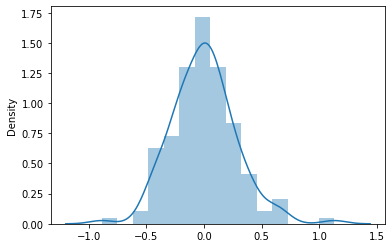

In [246]:
sns.distplot(Residual, bins =15)


Making Predictions

In [247]:
df_test[col_list] = scaler.transform(df_test[col_list])
y_test = df_test.pop('price')
X_test = df_test

In [248]:
final_cols = X6.columns


In [249]:
X_test_model6= X_test[final_cols]
X_test_model6.head()

,carwidth,enginesize,compressionratio,fueltype_gas,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginelocation_rear,enginetype_rotor,...,car_company_dodge,car_company_honda,car_company_mazda,car_company_mitsubishi,car_company_nissan,car_company_plymouth,car_company_porsche,car_company_renault,car_company_toyota,car_company_volkswagen
160,-0.652569,-0.660242,-0.278345,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
186,-0.154030,-0.390836,-0.278345,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
59,0.299187,-0.072447,-0.384120,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
165,-0.833856,-0.660242,-0.172569,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
140,-0.924500,-0.415328,-0.357676,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [250]:
X_test_sm = sm.add_constant(X_test_model6)


In [251]:
y_pred = Model_6.predict(X_test_sm)


In [252]:
y_pred.head()


160   -0.742927
186   -0.416060
59    -0.190182
165   -0.825119
140   -0.552045
dtype: float64

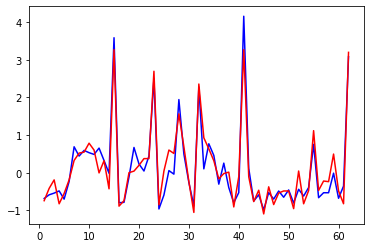

In [254]:
c = [i for i in range(1,63,1)]
plt.plot(c, y_test,color = 'Blue')
plt.plot(c, y_pred,color = 'red')
# plt.xlabel()
# plt.ylabel()

Text(0, 0.5, 'y_pred')

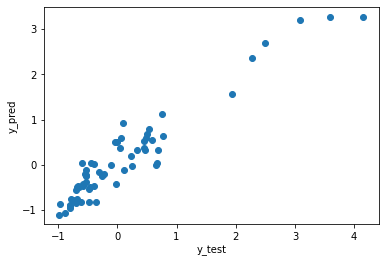

In [255]:
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

Model Evaluation

In [256]:
r_square_error = r2_score(y_test,y_pred)
r_square_error

0.9117439040148927

In [257]:
print("Variables that are significant in predicting the price of a car : \n")
print("enginesize, carwidth, enginetype_rotor, car_company_bmw, enginelocation_rear, car_company_renault (-vely)")

Variables that are significant in predicting the price of a car : 

enginesize, carwidth, enginetype_rotor, car_company_bmw, enginelocation_rear, car_company_renault (-vely)
